In [1]:
load("/Users/yao/Desktop/stat201b/HW/HW6/berkhousing.RData")

data <- berkhousing[with(berkhousing, order(sqft)),]
y <- na.omit(data)$price
x <- na.omit(data)$sqft

In [2]:
#KNN
r_knn <- function(smallx, x, y, k){
    dist <- abs(smallx-x)
    df <- data.frame(x, y, dist)
    sorted_df <- df[with(df, order(dist)),]
    return(sum(sorted_df$y[1:k])/k)
}

get_cv_x <- function(index, x){
    return(x[-index])
}

get_cv_y <- function(index, y){
    return(y[-index])
}

jhat_knn <- function(k, x, y){
    indexseq <- 1:length(x)
    cv_x <- sapply(indexseq, get_cv_x, x=x, simplify=FALSE)
    cv_y <- sapply(indexseq, get_cv_y, y=y, simplify=FALSE)
    cv_r <- mapply(r_knn, x, cv_x, cv_y, rep(k, length(x)))
    return(sum((y-cv_r)^2))
}

kseq <- 1:68
risk <- sapply(kseq, jhat_knn, x=x, y=y)
kopt <- kseq[risk==min(risk)]
print("the optimal k is:")
print(kopt)
print("the cv risk is:")
print(jhat_knn(kopt, x, y))

[1] "the optimal k is:"
[1] 29
[1] "the cv risk is:"
[1] 868392.2


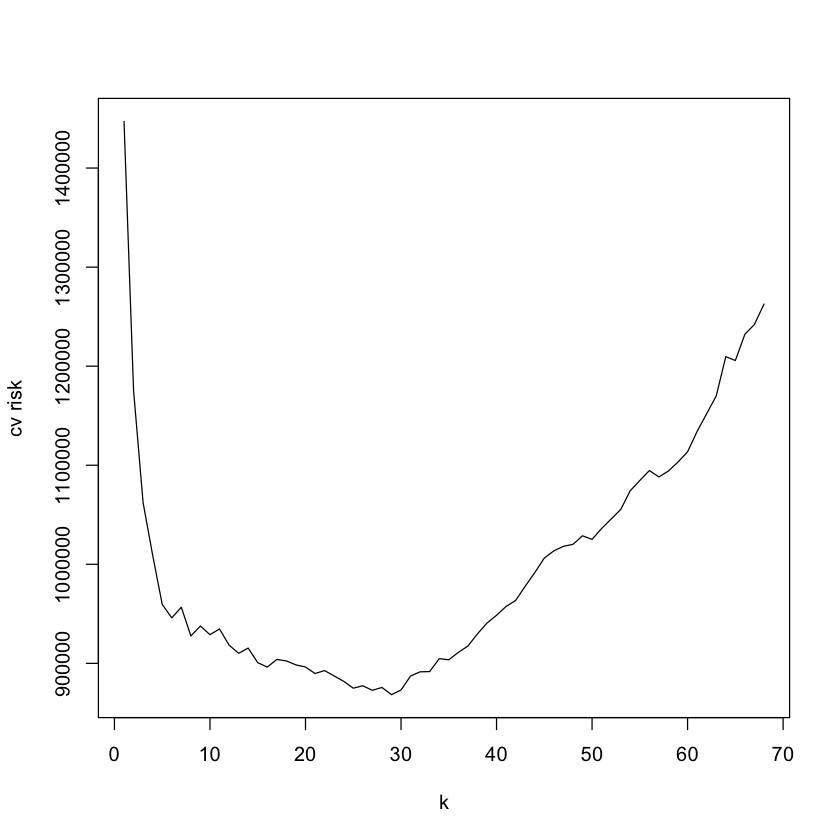

In [3]:
plot(kseq, risk, type='l', xlab='k', ylab='cv risk')

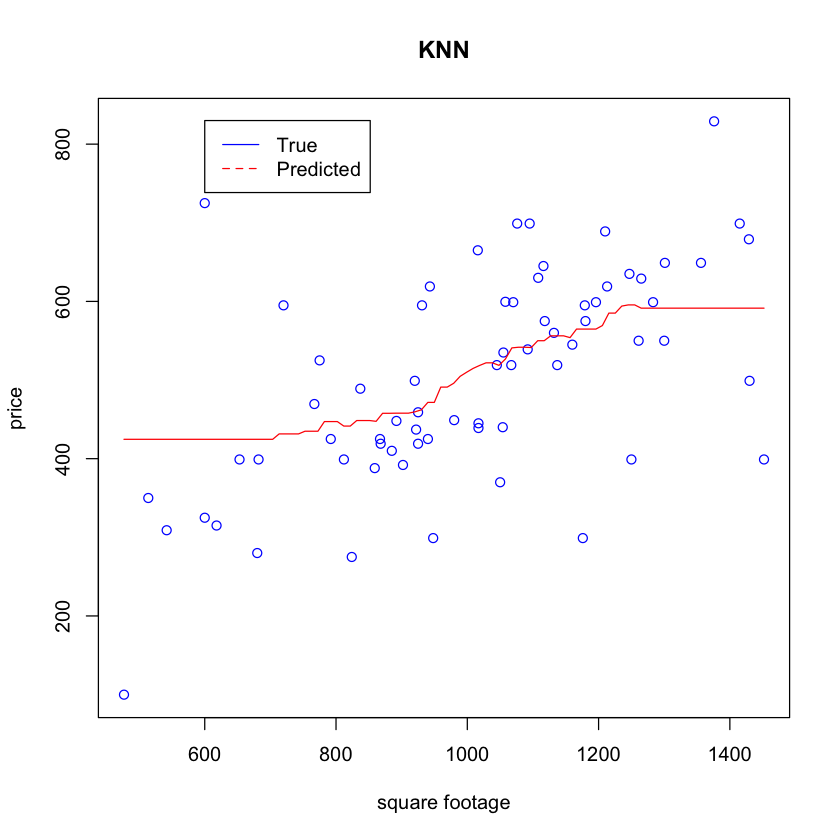

In [4]:
plot(x, y, xlab='square footage', ylab='price', main="KNN", col='blue')
xseq <- seq(min(x), max(x), length=100)
lines(xseq, sapply(xseq, r_knn, x=x, y=y, k=kopt), type='l', col='red')
legend(list(x = 600,y = 830), legend = c('True', 'Predicted'), col=c('blue', 'red'), lty=1:2)

[1] "the optimal bandwidth h is:"
[1] 124.7581
[1] "the leave-one-out cv risk estimate is:"
[1] 893382.8


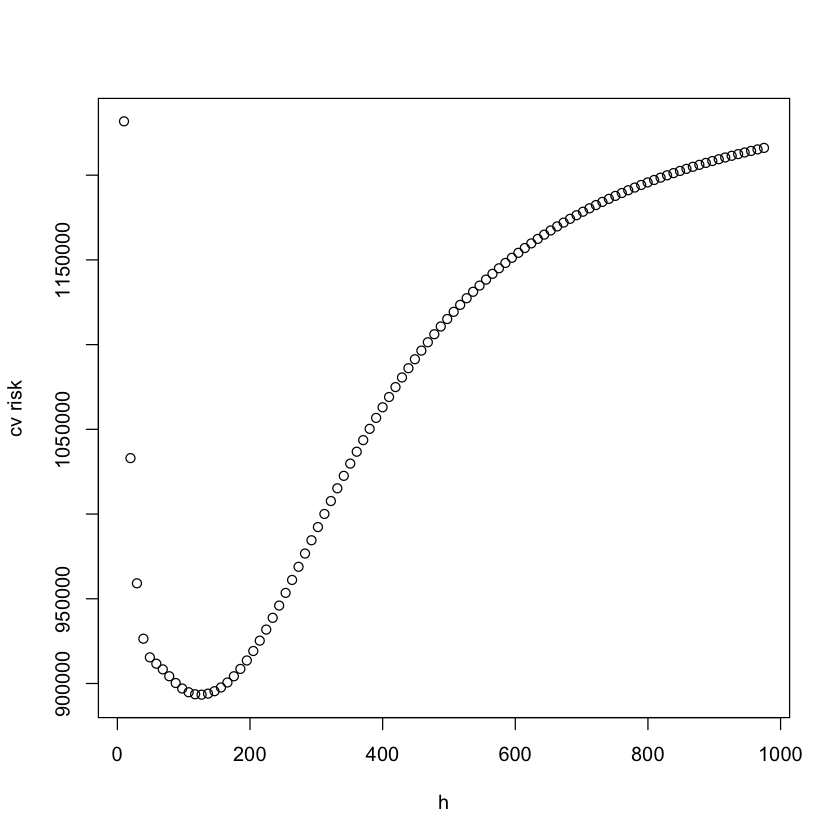

In [5]:
### kernel regression
w_x <- function(smallx, x, h){
    numer <- dnorm((smallx-x)/h)
    denom <- sum(dnorm((smallx-x)/h))
    return(numer/denom)
}

r_x <- function(smallx, x, y, h){
    return(sum(w_x(smallx, x, h)*y))
}

jhat <- function(h, x, y) {
    crossmat <- outer(x, x, '-')/h
    smallxseq <- x
    numer <- (y-sapply(smallxseq, r_x, x=x, y=y, h=h))^2
    denom <- (1-dnorm(0)/rowSums(dnorm(crossmat)))^2
    return(sum(numer/denom))
}

hseq <- seq(10, max(x)-min(x), length=100)
risk <- sapply(hseq, jhat, x=x, y=y)
plot(hseq, risk, xlab='h', ylab='cv risk')

hopt <- optimize(jhat, lower=10, upper=max(x)-min(x), x=x, y=y)$minimum
print("the optimal bandwidth h is:")
print(hopt)
print("the leave-one-out cv risk estimate is:")
print(jhat(hopt, x, y))

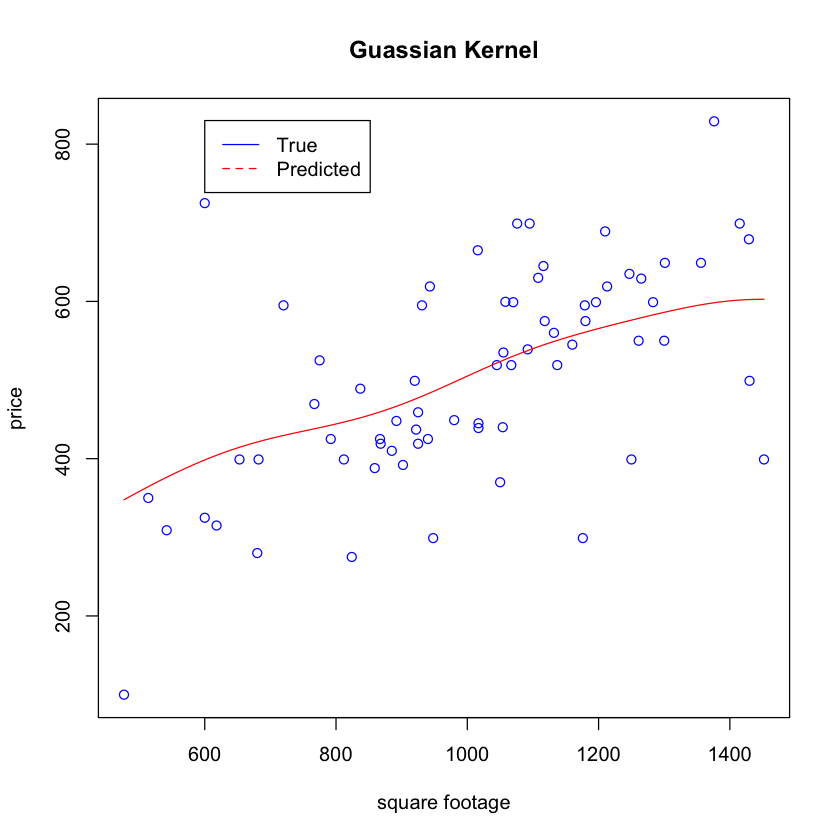

In [6]:
plot(x, y, xlab='square footage', ylab='price', main="Guassian Kernel", col='blue')
xseq <- seq(min(x), max(x), length=100)
lines(xseq, sapply(xseq, r_x, x=x, y=y, h=hopt), type='l', col='red')
legend(list(x = 600,y = 830), legend = c('True', 'Predicted'), col=c('blue', 'red'), lty=1:2)

In [7]:
print("since for KNN, the minimum cv risk is smaller than kernel estimator, so we prefer KNN in this case")

[1] "since for KNN, the minimum cv risk is smaller than kernel estimator, so we prefer KNN in this case"
